In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color: pink; padding: 10px"><strong>
@the goal of this project is to analyze diabetes data<br>
@pick any group in this dataset as an initial comparison point<br>
@pick a feature/measure/indicator<br>
@compare above group to any other (different) group  - you only need to do one additional group comparison (but you’re welcome to do more comparisons if you feel compelled to do so)<br>
@the analysis should include some descriptive statistics<br>
@the analysis should include one cleaning task (or more)<br>
@the analysis should include one visualization (or more)<br>
@the analysis should include a brief conclusion statement (not more than two or three sentences)
</div>

<H1>Data Exploration and Upload


In [3]:
#import dataset
#define missing values

missing_values = ['?', 'Unknown/Invalid', 'nan', 'None']

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv'
                 , na_values = missing_values)

/var/folders/7b/vxx6db214mngjcc97mk085qc0000gn/T/ipykernel_77432/1053551091.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv'


In [4]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.shape

#101,766 rows, 50 columns

(101766, 50)

In [6]:
df.info()

#most of treatments are object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101763 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
#take a look of descriptive data
df.describe().round(2)

#the avg time in hospital is 4.40 days
#the avg num of lab procedures is 43.10

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00
mean,1.652016e+08,5.433040e+07,2.02,3.72,5.75,4.40,43.10,1.34,16.02,0.37,0.20,0.64,7.42
std,1.026403e+08,3.869636e+07,1.45,5.28,4.06,2.99,19.67,1.71,8.13,1.27,0.93,1.26,1.93
min,1.252200e+04,1.350000e+02,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,8.496119e+07,2.341322e+07,1.00,1.00,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,1.523890e+08,4.550514e+07,1.00,1.00,7.00,4.00,44.00,1.00,15.00,0.00,0.00,0.00,8.00
75%,2.302709e+08,8.754595e+07,3.00,4.00,7.00,6.00,57.00,2.00,20.00,0.00,0.00,1.00,9.00
max,4.438672e+08,1.895026e+08,8.00,28.00,25.00,14.00,132.00,6.00,81.00,42.00,76.00,21.00,16.00


<H1>Data Exploration

Let's take a look of what we have in some columns, and to know the general shape of dataset

In [8]:
#readmitted includes over 30 days, less than 30 days and no readmitted
df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [9]:
#race column includes '?' should count as missing value
df.race.unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [10]:
#gender column includes 'Unknown/Invalid' should count as missing value
df.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [11]:
#age column is distributed by age ranges with each range spanning 10 years
df.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [12]:
#weight column includes '?' should count as missing value

df.weight.unique()

array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [13]:
#time in hospital from 1 day to 14 days
df.time_in_hospital.unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14])

In [14]:
df.number_diagnoses.unique()

array([ 1,  9,  6,  7,  5,  8,  3,  4,  2, 16, 12, 13, 15, 10, 11, 14])

In [15]:
df.num_medications.unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 53, 48, 57, 59, 56, 60, 63, 58, 70, 67, 64, 69, 65,
       68, 66, 81, 79, 75, 72, 74])

In [16]:
df.num_lab_procedures.unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  46,  28,  48,  72,  10,   2,  65,  67,  40,
        54,  58,  57,  43,  32,  83,  34,  39,  69,  38,  56,  22,  96,
        78,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

<H3>#None to be missing values??

<div style="background-color: lightblue; padding: 10px"><strong>
#Based on data dictionary 'None' means 'not measured' <br>
#take 'None' as missing values</div>

In [17]:
df.max_glu_serum.unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [18]:
df.A1Cresult.unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [19]:
df.insulin.unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [20]:
df.time_in_hospital.unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14])

In [21]:
df.diabetesMed.unique()

array(['No', 'Yes'], dtype=object)

<div style="background-color: lightblue; padding: 10px"><strong>Sum up:<br>
Take '?', 'Unknown/Invalid', 'nan', 'None' as missing values<br>
Go back to define missing values, and check null data as next step.</div>

<H1>Data Cleaning

In [22]:
#check null values
df.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
#sum up null values
df.isnull().sum()

#a lot of missing values on 'max_glu_serum', 'max_glu_serum', 'weight', 'payer_code', 'medical_specialty' columns
#let's keep these columns first and see some EDA

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [24]:
#sum up null values
df.isnull().sum().sum()

#374,020 null vales in the dataset

374020

<H1>Patients of Demographic

In [25]:
#Look at the distribution by race

race = df.groupby('race').count()
race

#most patients are Caucasian

,encounter_id,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,,,,,,,,,,,,,,,,,,,,,
AfricanAmerican,19210,19210,19210,19210,113,19210,19210,19210,19210,9957,...,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210
Asian,641,641,641,641,9,641,641,641,641,376,...,641,641,641,641,641,641,641,641,641,641
Caucasian,76099,76099,76099,76099,2907,76099,76099,76099,76099,47568,...,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099
Hispanic,2037,2037,2037,2037,0,2037,2037,2037,2037,1044,...,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037
Other,1506,1506,1505,1506,30,1506,1506,1506,1506,836,...,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506


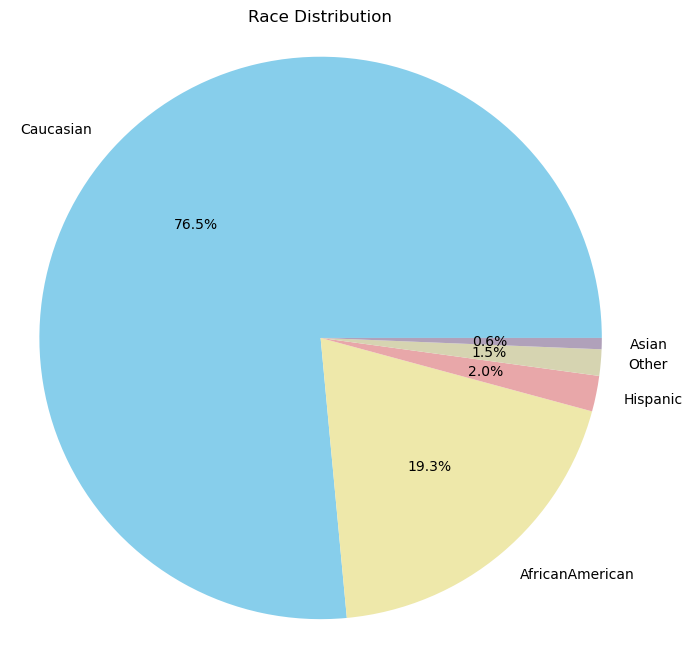

In [26]:
#create pie chart to see the percentage of race distribution

race_counts = df['race'].value_counts()
total_races = race_counts.sum()
race_percentage = (race_counts / total_races) * 100


# Define custom colors for the pie chart
custom_colors = ['skyblue', 'palegoldenrod', '#E8A7A9', '#D6D4B1', '#B0A1BA']


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_percentage, labels=race_percentage.index, autopct='%1.1f%%' , colors=custom_colors)
plt.title('Race Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

#most diabete patients are Caucasian
#Caucasian 76.5%, AfricanAmerican 19.3%, Hispanic 2%, Other 1.5%, Asian 0.6%

In [27]:
#group by gender

gender = df.groupby('gender').count()
gender

#Females are more than males

,encounter_id,patient_nbr,race,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
gender,,,,,,,,,,,,,,,,,,,,,
Female,54708,54708,53575,54708,1648,54708,54708,54708,54708,33164,...,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708
Male,47055,47055,45917,47055,1549,47055,47055,47055,47055,28344,...,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055


In [28]:
#group by gender

age = df.groupby('age').count()
age

#elders are more than young generation
#most patients are in the age group of 70-80 and 60-70

,encounter_id,patient_nbr,race,gender,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
age,,,,,,,,,,,,,,,,,,,,,
[0-10),161,161,160,161,5,161,161,161,161,14,...,161,161,161,161,161,161,161,161,161,161
[10-20),691,691,682,691,18,691,691,691,691,228,...,691,691,691,691,691,691,691,691,691,691
[20-30),1657,1657,1611,1657,69,1657,1657,1657,1657,1045,...,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657
[30-40),3775,3775,3699,3775,85,3775,3775,3775,3775,2101,...,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775
[40-50),9685,9685,9465,9685,231,9685,9685,9685,9685,5536,...,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685
[50-60),17256,17256,16895,17256,500,17256,17256,17256,17256,9948,...,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256
[60-70),22483,22483,21988,22482,720,22483,22483,22483,22483,13591,...,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483
[70-80),26068,26068,25469,26066,938,26068,26068,26068,26068,15543,...,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068
[80-90),17197,17197,16800,17197,539,17197,17197,17197,17197,11505,...,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197


In [29]:
#group by age and gender

age_gender = df.groupby(['age', 'gender']).size().reset_index(name='count')
age_gender

#most patients at the age of 70-80, females are more than males 

,age,gender,count
0,[0-10),Female,83
1,[0-10),Male,78
2,[10-20),Female,402
3,[10-20),Male,289
4,[20-30),Female,1114
5,[20-30),Male,543
6,[30-40),Female,2162
7,[30-40),Male,1613
8,[40-50),Female,4811
9,[40-50),Male,4874


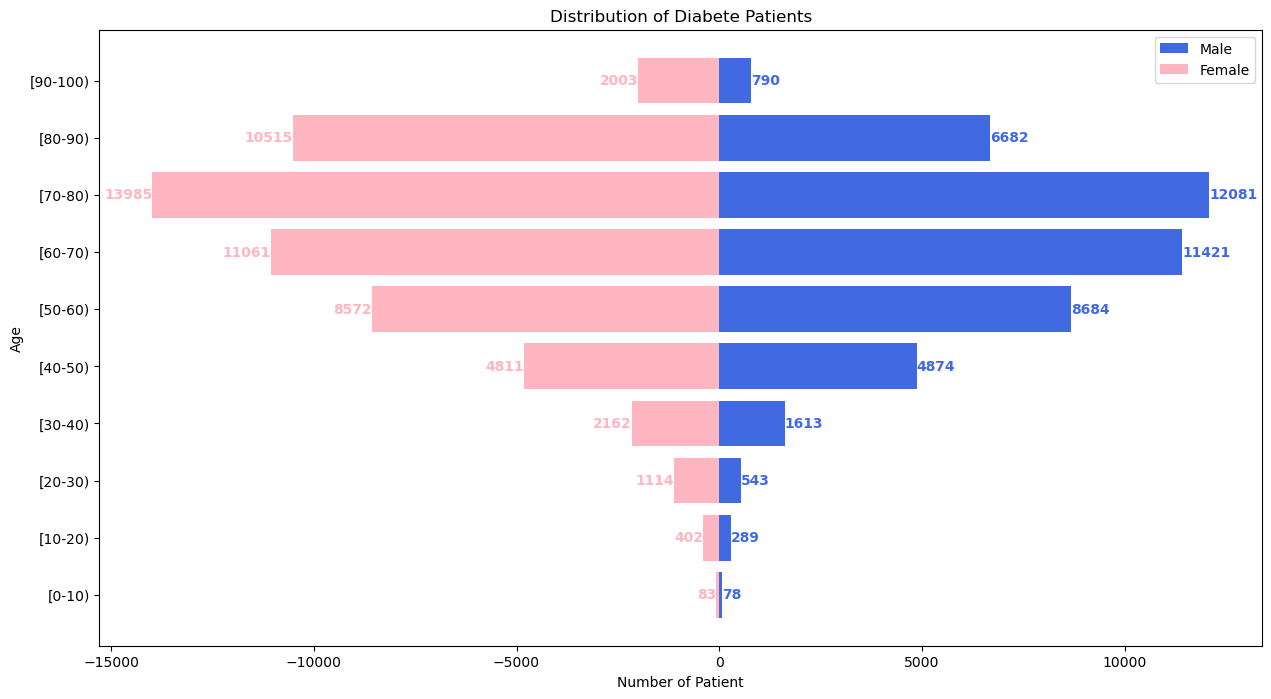

In [51]:
#Create population pyramid to see the distribution

#group by age and gender
population_pyramid_data = df.groupby(['age', 'gender']).size().unstack()

# Create a function to plot the population pyramid
def population_pyramid(data, title):
    age_groups = data.index
    male_counts = data['Male']
    female_counts = -data['Female']  # Make female counts negative 

    fig, ax = plt.subplots(figsize=(15, 8))  

    ax.barh(age_groups, male_counts, color='royalblue', label='Male', linewidth=2)
    ax.barh(age_groups, female_counts, color='lightpink', label='Female', linewidth=2)

    # Add labels for male counts
    for i, male_count in enumerate(male_counts):
        ax.text(male_count, i, male_count, va='center', ha='left', color='royalblue', fontsize=10, weight='bold')

    # Add labels for female counts
    for i, female_count in enumerate(female_counts):
        ax.text(female_count, i, abs(female_count), va='center', ha='right', color='lightpink', fontsize=10, 
                weight='bold')

    ax.set_xlabel('Number of Patient')
    ax.set_ylabel('Age')
    ax.set_title(title)

    
    ax.legend()
    plt.show()

# Plot the population pyramid
population_pyramid(population_pyramid_data, 'Distribution of Diabete Patients')


#most patients are in the age of 70-80, and women are more than men

<div style="background-color: lightblue; padding: 10px"><strong>
Based on the data exploration above, the following key findings were observed:
<br>
    
1. Ethnic Distribution: The majority of diabetes patients in the dataset are Caucasian, accounting for 76.5% of the total. AfricanAmerican represents the second-largest ethnic group, comprising 19.3% of the patients. Hispanic patients account for 2%, while the "Other" category encompasses 1.5% of the patients. Asian patients are the smallest group,  only 0.6% of the total.
<br>
    
2. Gender Distribution: Women outnumber men in the diabetes patient population, except in the age groups of 40-50 and 50-60, where men slightly outnumber women. This indicates a potential gender-based variation in diabetes prevalence within specific age ranges.
<br>

3. Age Distribution: The age distribution of diabetes patients shows a progressive increase in the number of patients with advancing age. Most patients fall within the age group of 70-80, indicating a higher incidence of diabetes among older individuals. The age group of 70-80 represents the peak in patient numbers. However, the patient count starts decreasing in the 80-90 age range, that may be attributed to the average life expectancy in the United States, which stands at 76.1 years. 
(According to CDC: https://www.cdc.gov/nchs/pressroom/nchs_press_releases/2022/20220831.htm)

These findings provide valuable insights into the demographic distribution of diabetes patients in the dataset. Further analysis and exploration of these trends could be used to inform targeted healthcare interventions and tailor diabetes management strategies based on patient characteristics such as ethnicity, gender, and age.

</div></strong>




<H2>Number of Readmitted

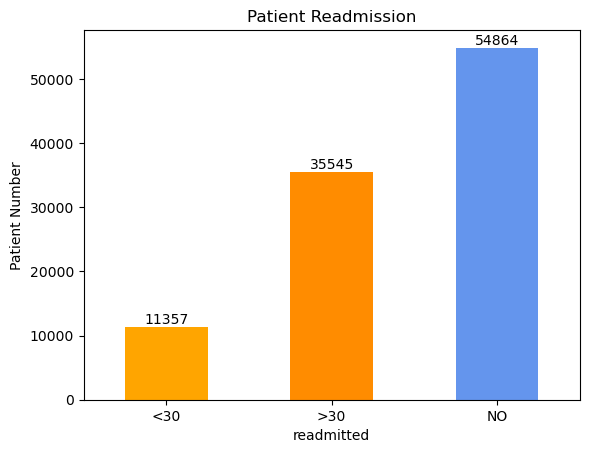

In [31]:
#patient readmission bar chart

readmission = df.groupby('readmitted').size().plot(kind='bar', 
                                                   color = [ 'orange','darkorange','cornflowerblue'])

# Annotate the bars with their respective counts
for p in readmission.patches:
    readmission.annotate(str(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Patient Readmission')
plt.xticks(rotation=360)
plt.ylabel('Patient Number')

plt.show()

#Most patients doesn't readmitted, but can't make sure the percentage directly, create a pie chart instead

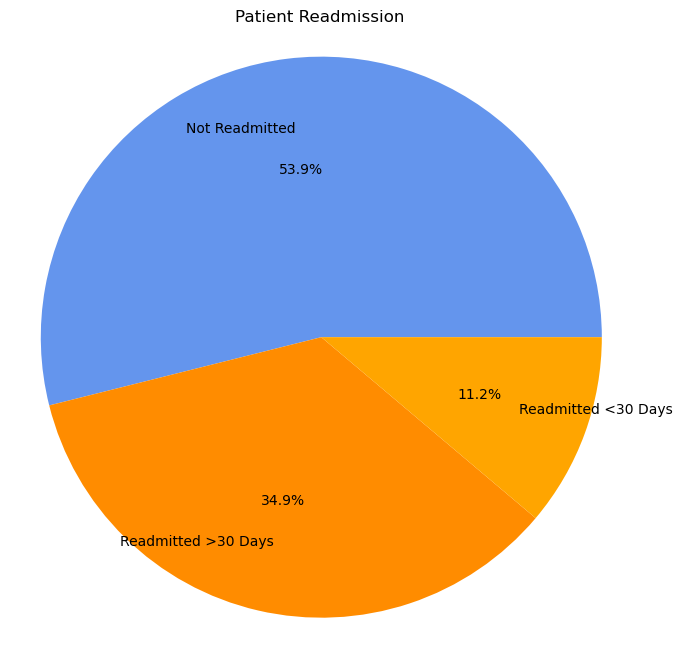

In [32]:
#create a pie chart to check patient readmission more clear

#Group by 'readmitted' and get the counts
readmission_counts = df['readmitted'].value_counts()

#Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(readmission_counts, 
        labels = ['Not Readmitted', 'Readmitted >30 Days', 'Readmitted <30 Days'],
        colors = ['cornflowerblue', 'darkorange', 'orange'], autopct='%1.1f%%',labeldistance=0.75)


plt.title('Patient Readmission')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the pie chart
plt.show()

##Add a circle in the center to make it look like a donut chart###
#centre_circle = plt.Circle((0, 0), 0.50, fc='white')
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)

############
#Now we can see that over half of the patients were not readmitted. 
#11.2% of the patients were readmitted within 30 days
#and 34.9% of the patients were readmitted over 30 days.

<H2>Correlation between Readmission and Insulin Dosage?

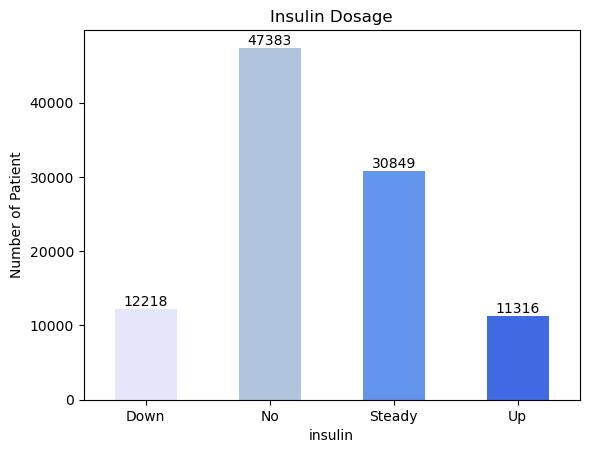

In [33]:
insulin = df.groupby('insulin').size().plot(kind='bar', 
                                            color = ['lavender', 'lightsteelblue', 'cornflowerblue', 'royalblue'])
plt.title('Insulin Dosage')
plt.xticks(rotation=0)
plt.ylabel('Number of Patient')

# Annotate the bars with their respective counts
for p in insulin.patches:
    insulin.annotate(str(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#Most patients didn't get prescription for insulin, and 30,849 patients didn't change the dosage.
#Only 11,316 patients got an increased dosage, and 12,218 got a decreased dosage of insulin.

<div style="background-color: pink; padding: 10px"><strong>
Values:<br>
“up” if the dosage was increased during the encounter,<br>
“down” if the dosage was decreased, <br>
“steady” if the dosage did not change<br>
“no” if the drug was not prescribed</div></strong>

<Figure size 3000x1000 with 0 Axes>

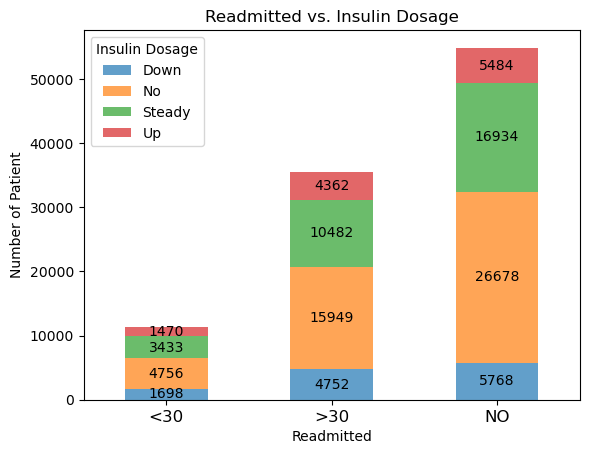

In [34]:
# Group by 'readmitted' and 'insulin' and get the counts
readmitted_insulin = df.groupby(['readmitted', 'insulin']).size().unstack()

# Create a stacked bar chart
plt.figure(figsize=(30, 10))
ri = readmitted_insulin.plot(kind='bar', stacked=True, alpha=0.7)

# Add labels inside the bars with their respective counts
for p in ri.containers:
    ri.bar_label(p, label_type='center')

# Add labels and title
plt.xlabel('Readmitted')
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Number of Patient')
plt.title('Readmitted vs. Insulin Dosage')

# Show the plot
plt.legend(title='Insulin Dosage', loc='upper left')
plt.show()

#Can't see clear correlation between readmission and the change of insulin dosage

<div style="background-color: lightblue; padding: 10px"><strong>It appears that a clear correlation between readmission and changes in insulin dosage is not readily evident. Upon the stacked bar chart, the discrepancy between the two groups is not substantial enough to establish a definitive correlation.</div></strong>

<H2>Correlation between Readmission and Change of Medications?


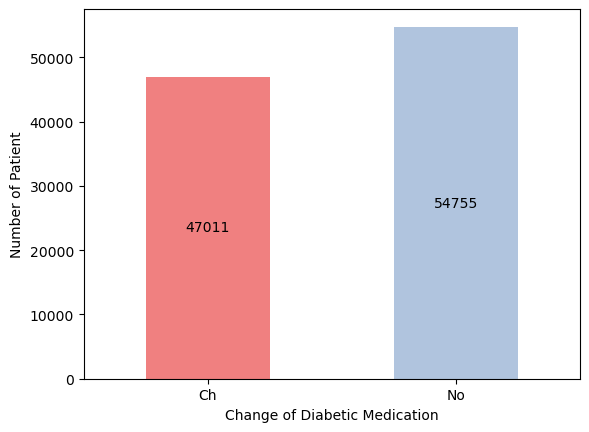

In [35]:
#If there was a change of Diabetic medication

change = df.groupby('change').size().plot(kind='bar', color = ['lightcoral', 'lightsteelblue'])
plt.xlabel('Change of Diabetic Medication')
plt.ylabel('Number of Patient')
plt.xticks(rotation = 0)

# Add labels inside the bars with their respective counts
for p in change.containers:
    change.bar_label(p, label_type='center')

#Over half of the patients received a medication change
#while less than half of the patients did not receive any changes

<Figure size 1500x600 with 0 Axes>

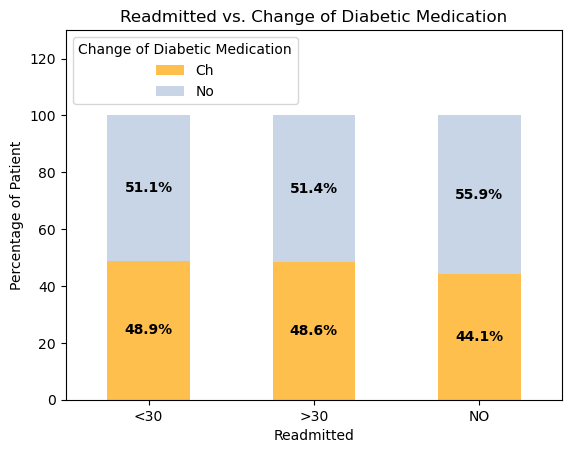

In [36]:
# Group by 'readmitted' and 'change' and get the counts
readmitted_change = df.groupby(['readmitted', 'change']).size().unstack()

# Calculate the percentages for each category within each group (row-wise normalization)
readmitted_change_percentage = readmitted_change.div(readmitted_change.sum(axis=1), axis=0) * 100

# Create a 100% stacked bar chart
plt.figure(figsize=(15, 6))
ax = readmitted_change_percentage.plot(kind='bar', stacked=True, alpha=0.7, color=['orange', 'lightsteelblue'])

# Annotate the bars with their respective percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=10, fontweight='bold')

# Add labels and title
plt.xlabel('Readmitted')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Patient')
plt.title('Readmitted vs. Change of Diabetic Medication')

# Adjust y-axis limits to provide more space for annotations
plt.ylim(top=130)

# Show the plot
plt.legend(title='Change of Diabetic Medication', loc='upper left')
plt.show()

<div style="background-color: lightblue; padding: 10px"><strong>
Based on the 100% stacked bar chart, it appears that there may be a potential correlation between readmission and changes in diabetic medication. The chart indicates that a higher percentage of patients experienced changes in their diabetic medication compared to patients who were not readmitted. However, upon closer examination, it is evident that the difference between the two groups is not statistically significant.</div></strong>






<H2>Correlations between numeric datas

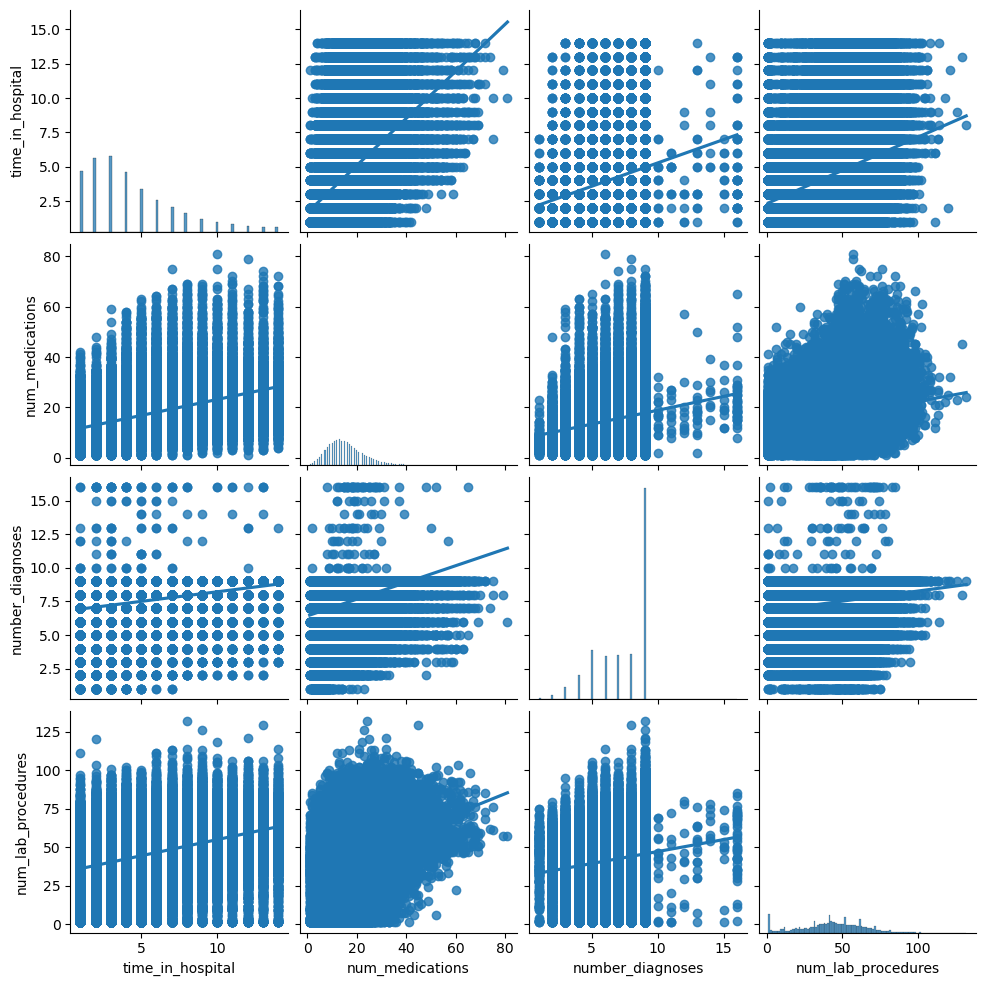

In [39]:
# Select numerical columns for the pairplot
numerical_columns = ['time_in_hospital','num_medications', 'number_diagnoses','A1Cresult', 
                    'num_lab_procedures']

# Create a pairplot for the selected numerical columns
sns.pairplot(df[numerical_columns], palette='viridis', kind='reg')
#hue='readmitted'

# Show the plot 
plt.show()

<div style="background-color: lightblue; padding: 10px"><strong>
Based on the pairplot analysis, it is evident that these variables show positive correlations. Notably, there appears to be a strong positive correlation between time in the hospital and the number of medications. That might because patients with longer hospital stays tend to receive a higher number of medications.<br>
    
Furthermore, the positive correlation between time in the hospital and the number of lab procedures may indicate that patients with longer hospital stays undergo more extensive medical testing and monitoring.<br>
    
The pairplot analysis provides valuable insights into the relationships between these variables, but further statistical analysis needed to quantify the strength of these correlations and help identify potential cause-and-effect relationships.
</div></strong>

<H2>Correlation between Readmission and A1Cresult?

<div style="background-color: pink; padding: 10px"><strong>
According to CDC website, the definition of A1Cresult:<br>
A normal A1C level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes, and a level of 6.5% or more indicates diabetes. Within the 5.7% to 6.4% prediabetes range, the higher your A1C, the greater your risk is for developing type 2 diabetes. Managing Diabetes.

source: https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html
</div></strong>

In [40]:
#count A1Cresult

A1Cresult_group = df.groupby('A1Cresult').count()
A1Cresult_group

#except of not measured patients, most patients who got A1Cresult were >8, and 3,812 patients got >7

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
A1Cresult,,,,,,,,,,,,,,,,,,,,,
>7,3812,3812,3730,3812,3812,88,3812,3812,3812,3812,...,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812
>8,8216,8216,7961,8216,8216,177,8216,8216,8216,8216,...,8216,8216,8216,8216,8216,8216,8216,8216,8216,8216
Norm,4990,4990,4905,4990,4990,81,4990,4990,4990,4990,...,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990


In [41]:
#drop some columns we don't need

df.drop(['patient_nbr','admission_type_id', 'discharge_disposition_id', 'admission_source_id','weight', 
         'metformin', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
         'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)
df

,encounter_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,2278392,Caucasian,Female,[0-10),1,41,0,1,0,0,0,1,NaN,NaN,No,No,No,NO
1,149190,Caucasian,Female,[10-20),3,59,0,18,0,0,0,9,NaN,NaN,Up,Ch,Yes,>30
2,64410,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,6,NaN,NaN,No,No,Yes,NO
3,500364,Caucasian,Male,[30-40),2,44,1,16,0,0,0,7,NaN,NaN,Up,Ch,Yes,NO
4,16680,Caucasian,Male,[40-50),1,51,0,8,0,0,0,5,NaN,NaN,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,0,9,NaN,>8,Down,Ch,Yes,>30
101762,443847782,AfricanAmerican,Female,[80-90),5,33,3,18,0,0,1,9,NaN,NaN,Steady,No,Yes,NO
101763,443854148,Caucasian,Male,[70-80),1,53,0,9,1,0,0,13,NaN,NaN,Down,Ch,Yes,NO
101764,443857166,Caucasian,Female,[80-90),10,45,2,21,0,0,1,9,NaN,NaN,Up,Ch,Yes,NO


<Figure size 800x600 with 0 Axes>

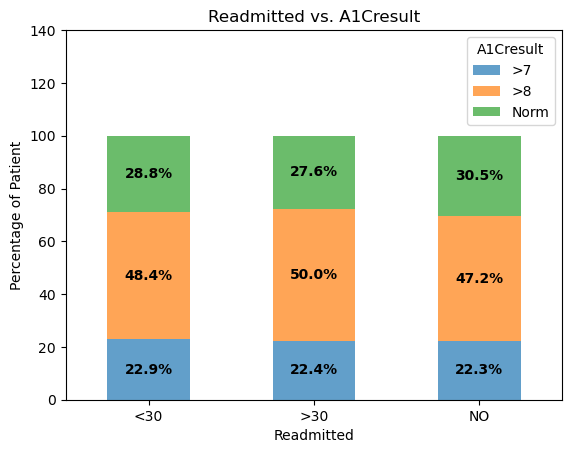

In [42]:
# Create a percentage stacked bar chart to see the correlation btw A1Cresult and readmission


# Group by 'readmitted' and 'A1Cresult' and get the counts
readmitted_A1Cresult = df.groupby(['readmitted', 'A1Cresult']).size().unstack()

# Calculate the percentages for each category within each group
readmitted_A1Cresult_percentage = readmitted_A1Cresult.div(readmitted_A1Cresult.sum(axis=1), axis=0) * 100

# Create a percentage stacked bar chart
plt.figure(figsize=(8, 6))
rapp = readmitted_A1Cresult_percentage.plot(kind='bar', stacked=True, alpha=0.7)

# Annotate the bars with their respective percentages
for p in rapp.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    rapp.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=10, fontweight='bold')

# Add labels and title
plt.xlabel('Readmitted')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Patient')
plt.title('Readmitted vs. A1Cresult')

# Adjust y-axis limits to provide more space for annotations
plt.ylim(top=140)

# Show the plot
plt.legend(title='A1Cresult', loc='upper right')
plt.show()

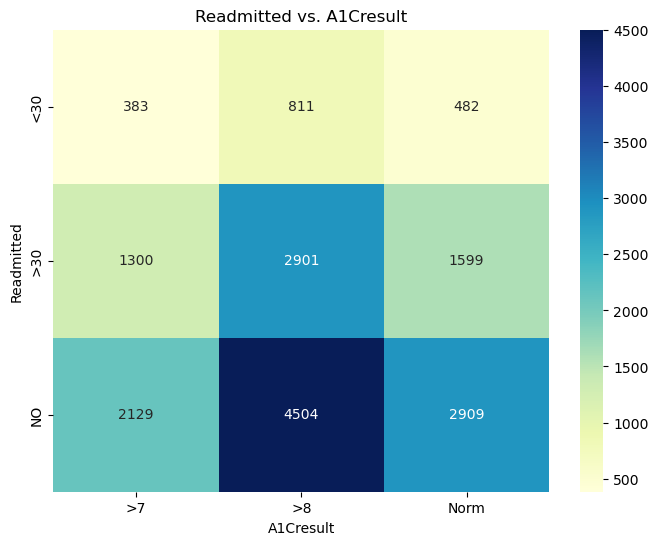

In [43]:
# Create a heatmap to see the correlation btw A1Cresult and readmission

plt.figure(figsize=(8, 6))

sns.heatmap(readmitted_A1Cresult, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

# Add labels and title
plt.xlabel('A1Cresult')
plt.ylabel('Readmitted')
plt.title('Readmitted vs. A1Cresult')

# Show the plot
plt.show()

<div style="background-color: lightblue; padding: 10px"><strong>
Based on the analysis of the percentage stacked bar chart and heatmap, a notable observation is that although a significant number of patients received an A1Cresult greater than 8, a distinct pattern emerges regarding A1Cresult levels among the different readmission groups.
<br>
    
Specifically, among patients who were readmitted over 30 days, half of them had an A1Cresult greater than 8. This proportion is higher compared to patients who were readmitted within 30 days and those who were not readmitted. The heatmap visually confirms this trend, indicating a higher concentration of patients with A1Cresult >8 in the "readmitted >30 days" group.
    
This finding highlights a potential association between higher A1Cresult levels and longer readmission durations. However, it is essential to interpret this correlation cautiously, as it may be influenced by other factors not accounted for in the analysis. The absence of data for A1Cresult among a significant number of patients may impact the overall analysis and conclusions.

Additionally, it is worth noting that despite a significant number of patients receiving an A1Cresult greater than 8, a considerable proportion of them did not experience readmission. That shows A1Cresult levels alone may not be the sole determinant of readmission risk, other factors may also take into consideration.
</div></strong>

<H2>Correlation between Readmission and Age?

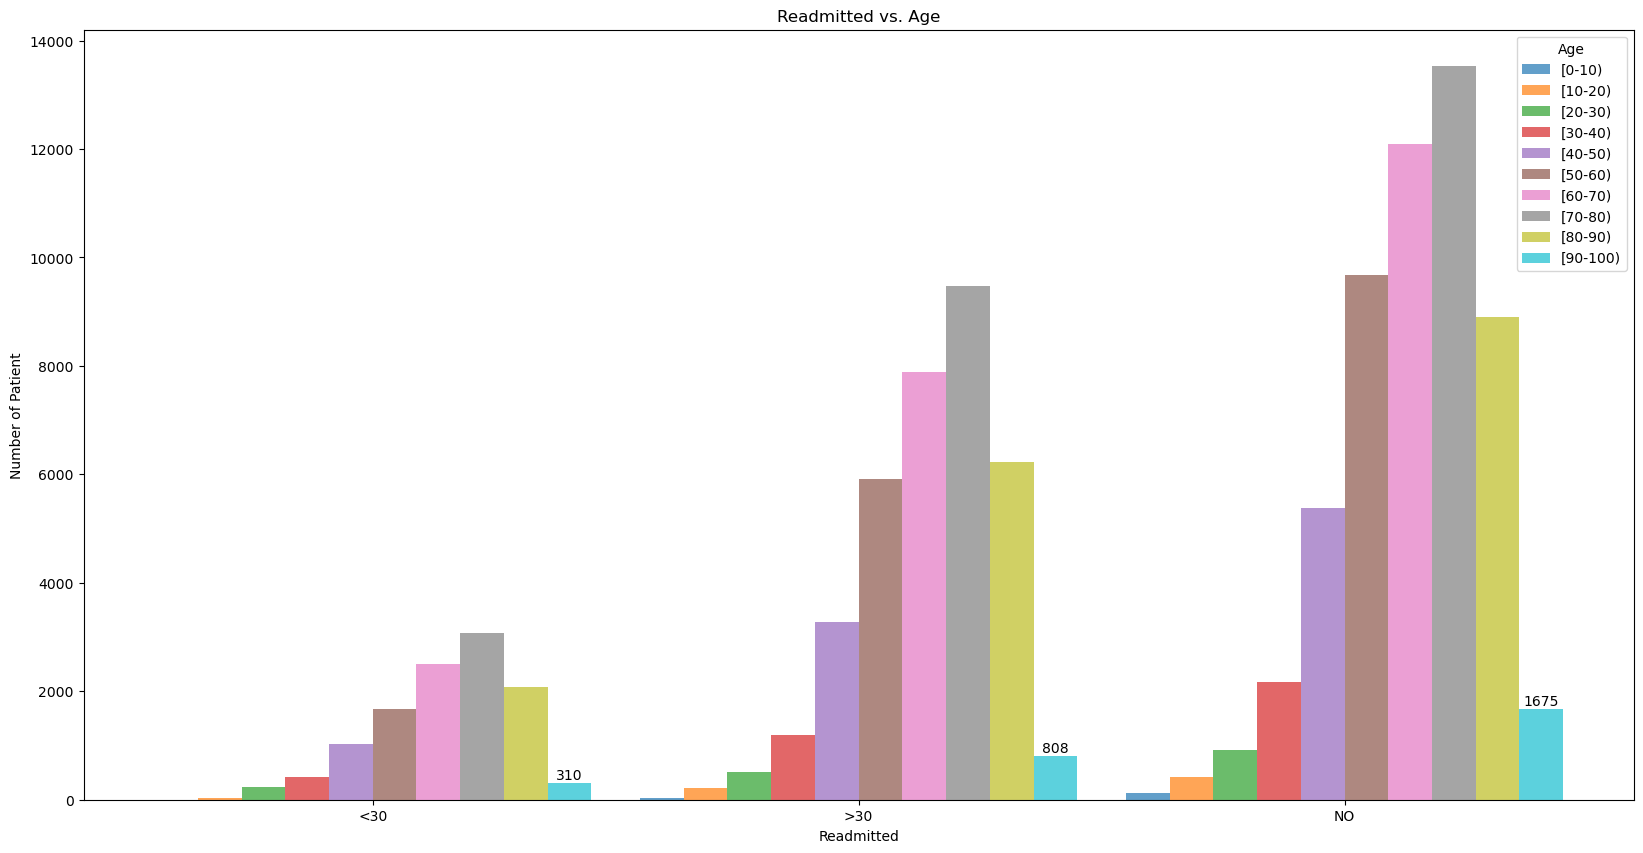

In [44]:
# Group by 'readmitted' and 'age' and get the counts
readmitted_age = df.groupby(['readmitted', 'age']).size().unstack()

# Create a grouped bar chart
plt.figure(figsize=(20, 10))

# Number of bars for each group
num_bars = len(readmitted_age)
num_age_groups = len(readmitted_age.columns)

# Width of each bar
bar_width = 0.09

# Set the position of each bar on the x-axis
bar_positions = list(range(num_bars))

# Plot each category of 'age' as a separate set of bars, grouped together
for i, age_group in enumerate(readmitted_age.columns):
    plt.bar([pos + (i * bar_width) for pos in bar_positions], readmitted_age[age_group], 
            width=bar_width, alpha=0.7, label=age_group)

# Add labels on top of each bar
for pos, count in enumerate(readmitted_age[age_group]):
        plt.text(pos + (i * bar_width), count + 10, str(count), ha='center', va='bottom')

        

# Adjust the position of x-axis ticks for better readability
plt.xticks([pos + ((num_age_groups - 1) * bar_width) / 2 for pos in bar_positions], readmitted_age.index)
        
        
# Add labels and title
plt.xlabel('Readmitted')
plt.ylabel('Number of Patient')
plt.title('Readmitted vs. Age')
plt.legend(title='Age', loc='upper right')

# Show the plot
plt.show()


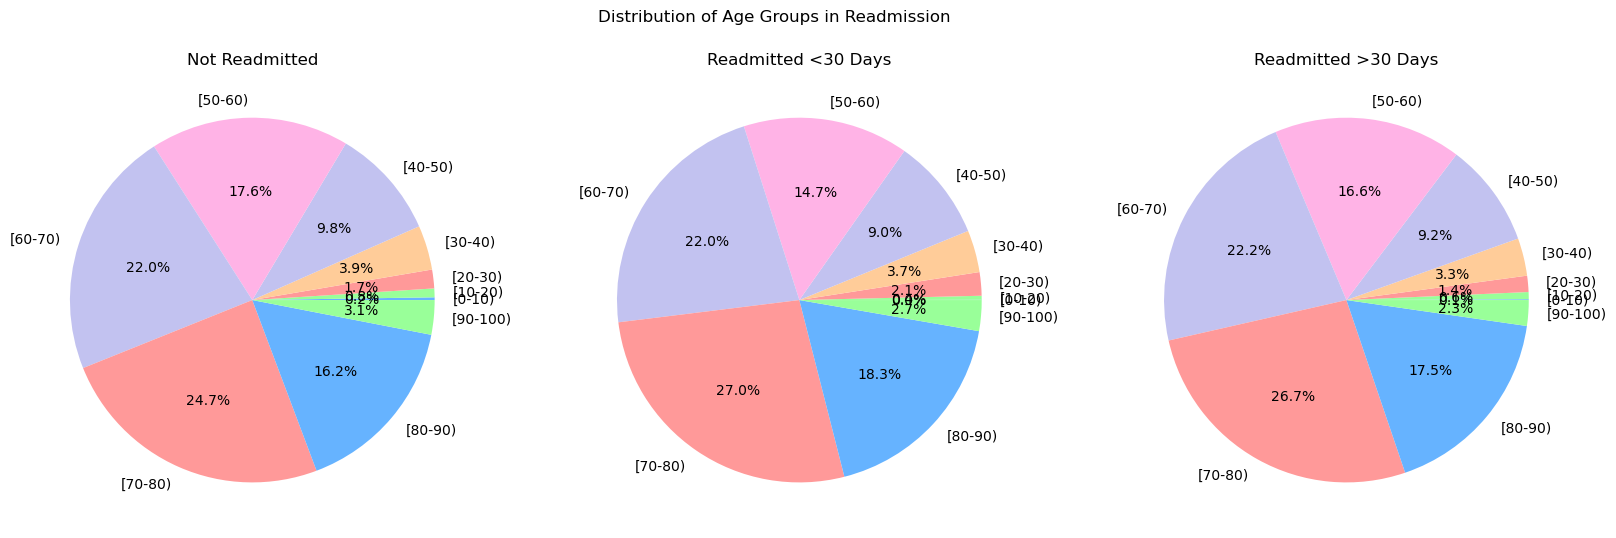

In [45]:
# Create three separate pie charts
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Colors for each age group
colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99', '#c2c2f0', '#ffb3e6', 
          '#c2c2f0', '#ff9999', '#66b3ff', '#99ff99']

# Plot the pie chart for 'Not Readmitted' group
axes[0].pie(readmitted_age.loc['NO'], labels=readmitted_age.columns, colors=colors, autopct='%1.1f%%')
axes[0].set_title('Not Readmitted')

# Plot the pie chart for 'Readmitted <30 Days' group
axes[1].pie(readmitted_age.loc['<30'], labels=readmitted_age.columns, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Readmitted <30 Days')

# Plot the pie chart for 'Readmitted >30 Days' group
axes[2].pie(readmitted_age.loc['>30'], labels=readmitted_age.columns, colors=colors, autopct='%1.1f%%')
axes[2].set_title('Readmitted >30 Days')

# Add a common title for all three pie charts
plt.suptitle('Distribution of Age Groups in Readmission')

# Show the plot
plt.show()


<div style="background-color: lightblue; padding: 10px"><strong>
Based on the analysis of the bar chart and pie chart depicting the relationship between readmission and age, a clear correlation between the two variables is not readily evident. The distribution of patients across different age groups in the three readmission categories (not readmitted, readmitted within 30 days, and readmitted over 30 days) does not show significant discrepancies that would allow for the establishment of a definitive correlation.
</div></strong>

<H2>Age and Time in Hospital 

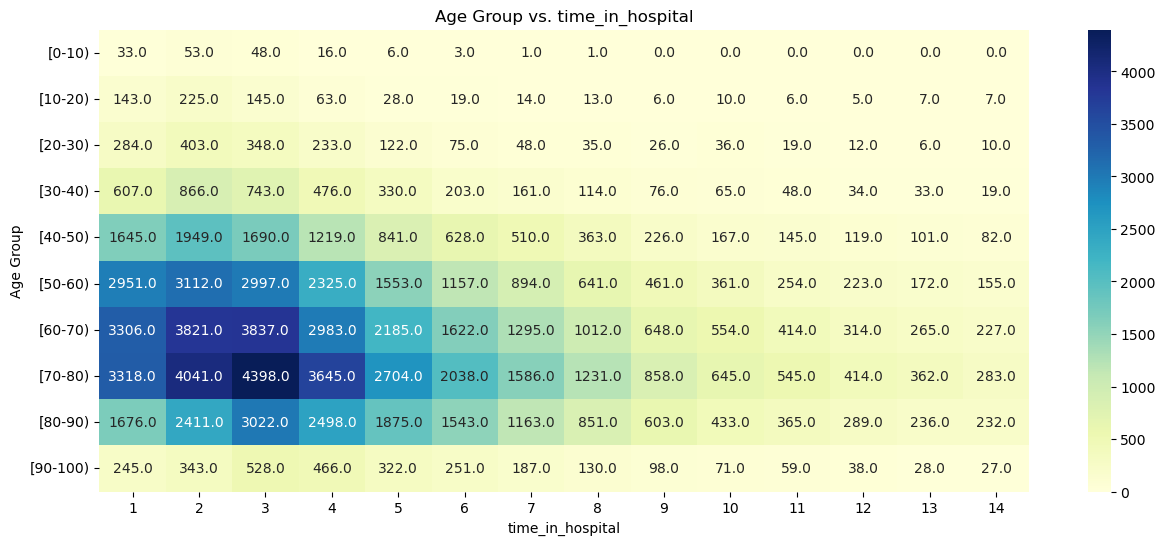

In [46]:
#heatmap for age group and time in hospital
age_hop = df.groupby(['age', 'time_in_hospital']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(age_hop, annot=True, fmt='.1f', cmap='YlGnBu', cbar=True)

# Add labels and title
plt.xlabel('time_in_hospital')
plt.ylabel('Age Group')
plt.title('Age Group vs. time_in_hospital')

plt.show()

<div style="background-color: lightblue; padding: 10px"><strong>

Based on the analysis of the heatmap, there appears to be a general trend regarding the relationship between age and time spend in the hospital. The heatmap provides insights into the distribution of hospital stay durations for different age groups.
<br>
    
Notably, the age group of 70-80 and 60-70 stands out with a notable concentration of patients staying in the hospital for 3 days. This finding suggests that individuals in this two age groups might require more extended hospital stays, potentially due to the prevalence of age-related health conditions that require thorough medical attention.
<br>
    
It is important to emphasize that the heatmap provides a comprehensive overview of the time spent in the hospital across different age groups. However, further investigations are warranted to understand the specific factors driving hospital stay durations for each age group comprehensively. 
</div></strong>



<H1>Summary

<div style="background-color: lightblue; padding: 10px"><strong>
The analysis reveals that the 70-80 age group experiences the highest readmission rate among diabetes patients. Additionally, the A1Cresult appears to be a potential influential factor in readmission, as a higher concentration of patients with A1Cresult >8 is observed in the "readmitted >30 days" group. Further investigations may be necessary to fully understand the complex factors of readmission in diabetes patients.
</div></strong>